# Computer Vision

Vamos a construir una red neuronal para que reconoxca diferentes articulos de ropa.

Para esto emplearemos una base de datos que ya existe y que esta en la nube.  [Fashion MNIST dataset](https://github.com/zalandoresearch/fashion-mnist)

Esta base de datos tiene imagenes de 28x28 de diferentes articulos de ropa.

Inclusive "Keras" que es una libreria que sua Tensorflow, la tiene como parte de su API para su uso directo.

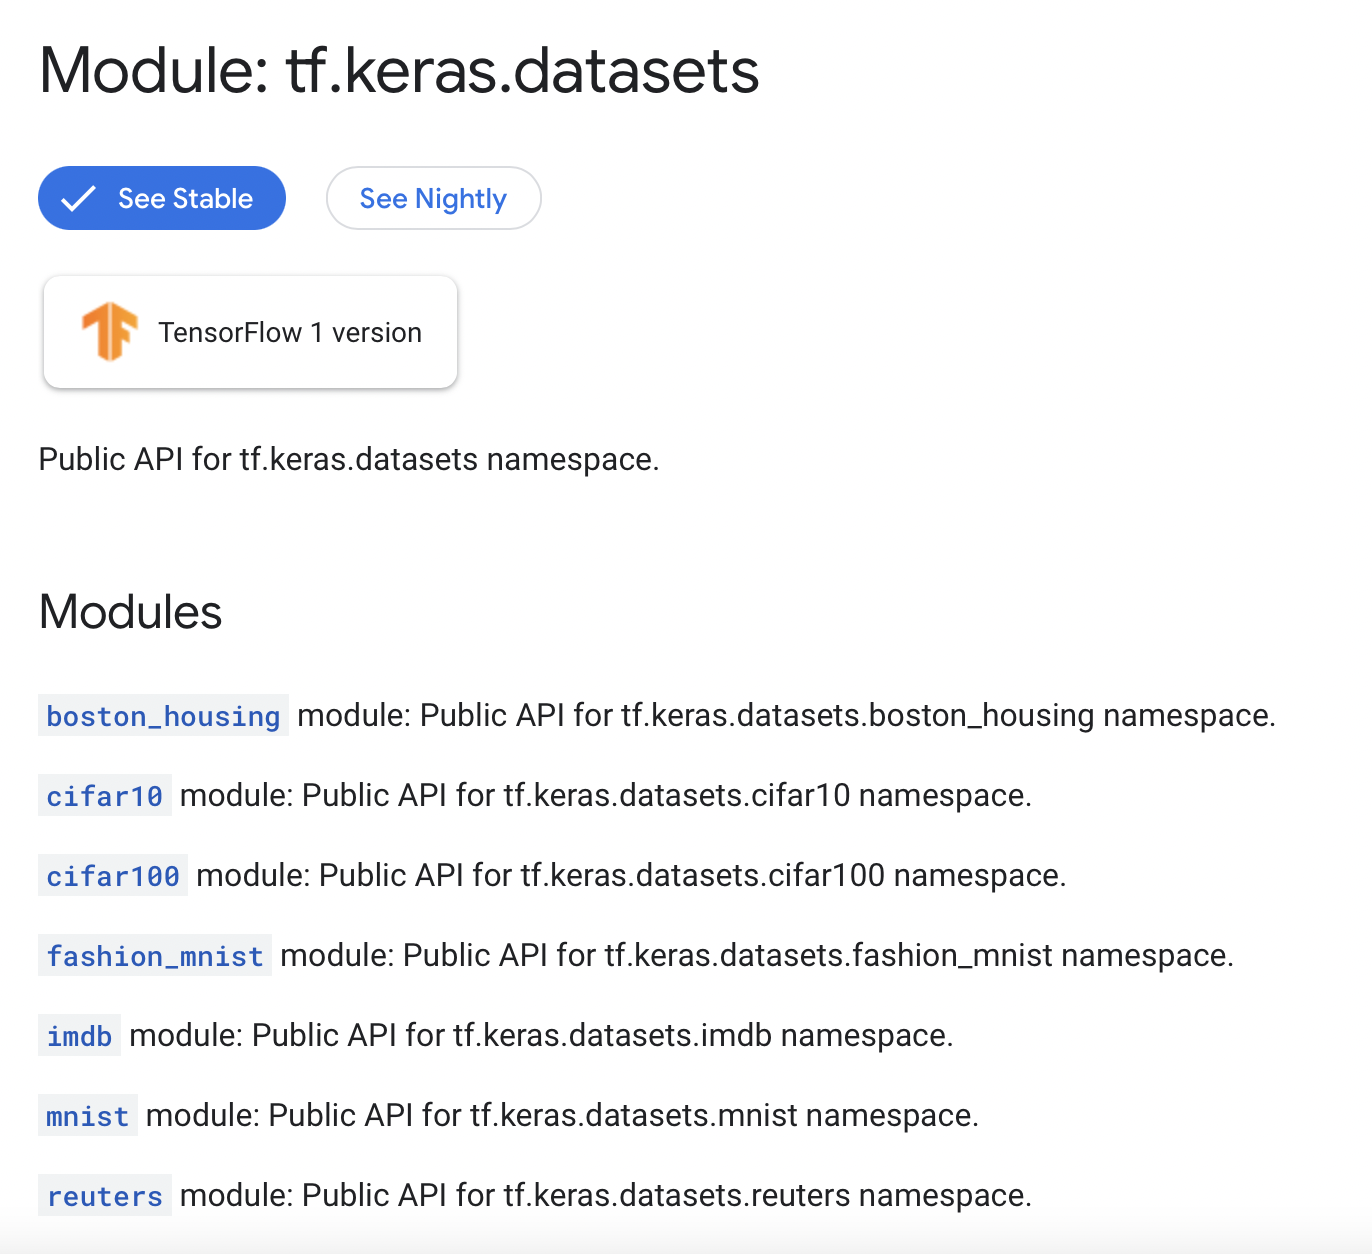

## Importar Librerias

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.8.0


## Cargar la Data

Label	Description

0	T-shirt/top

1	Trouser

2	Pullover

3	Dress

4	Coat

5	Sandal

6	Shirt

7	Sneaker

8	Bag

9	Ankle boot

In [ ]:
fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

## Ver la Data de los articulos de ropa

LABEL: 6

IMAGE PIXEL ARRAY:
 [[  0   0   0   0   0   0   0   0   1   0   0  37 192 177 171 199  27   0   0   0   1   3   0   0   0   0   0   0]
 [  0   0   0   0   0   0   9   0   0   0   0 135 230 162 155 253 164  14   0   0   0   0   3   0   0   0   0   0]
 [  0   0   0   0   1   0   0   0  64 152 232 207 195 155 157 201 227 224 221 172  94   4   0   0   0   0   0   0]
 [  0   0   0   0   0   0 112 179 205 199 192 197 216 194 192 220 210 192 191 203 207 208  62   0   1   0   0   0]
 [  0   0   0   0   0  75 208 186 178 185 172 197 213 195 200 208 199 188 187 181 180 204 192   0   0   0   0   0]
 [  0   0   0   0   0 180 190 179 185 182 184 178 166 193 185 167 187 186 184 184 192 192 223  28   0   0   0   0]
 [  0   0   0   0   0 205 190 182 182 185 182 185 181 182 180 180 185 186 182 184 201 195 219  72   0   0   0   0]
 [  0   0   0   0   0 210 186 194 181 181 182 178 180 184 182 177 179 185 184 194 211 188 218  95   0   0   0   0]
 [  0   0   0   0   0 217 179 193 193 175 175 174 

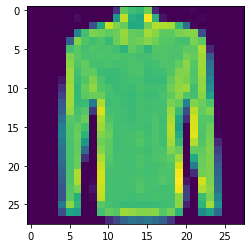

In [ ]:
index = 40

np.set_printoptions(linewidth=320)

# Imprimir el nombre y la imagen
print(f'LABEL: {training_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {training_images[index]}')

# Ver una imagen
plt.imshow(training_images[index])

## Normalizar la Data

La imagen se imprime como un array de numeros y van entre los valores o y 255.

En machine learning se normalizan los datos y esto significa que estos sean 0 y 1. Permitiendo asi un mejor procesamiento de los datos.

Ahora usaremos esos datos normalizados para crear:

- un set de entrenamiento (training).
- un set de pruebas (test).

El de pruebas no se usa en el modelo de la red neuronal y esto sirve para validar si el modelo esta correcto o tiene un buen enfoque.


In [ ]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

## Construir el Modelo

Sequential: Esto define una secuencia de capas en la red neuronal.

Flatten: Toma la imagen y los convierte en un array de 1 dimension.

Dense: Agrega una capa a la red neuronal.

RelU: Un "activation function" Le dice a la neurona que hacer. Asi que ReLU es un activation function. ReLU solo pasa valores 0 o mayores que cero a la red neuronal.


Softmax: es otro "activation function" y toma una lista de valores y los escala.


In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

## Practica

Que pasa si removemos Flatten?
R: Obtenemos un erros ya que necesitamos las imagenes en las dimensiones normalizadas entre 28x28 en una dimension para el analisis.

Que pasa si incremento o decremento el numero en la tercersa capa (10)?
R: Se obtiene un error ya que el numeros de nueronas deberia ser igual al numero de clases que estoy tratatndo de clasificar. La base de datos tiene 10 (0 -9).

Que pasa si colocamos mas epochs al modelo?
R: Se puede convertir en un proceso colateral donde sobre cargas al modelo. Puedes reducir la perdida (loss) pero incrementar otro valos incessario, o un valor de prediccion se puede detener. A esto se le llama "Overfitting"

In [ ]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4940 - accuracy: 0.8253
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3729 - accuracy: 0.8654
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3347 - accuracy: 0.8773
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3128 - accuracy: 0.8846
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2950 - accuracy: 0.8906


## Evaluar el Modelo

Aqui podemos ver un accuracy del 87%.

No esta mal, pero obviamente lo podemos mejorar.

In [ ]:
model.evaluate(test_images, test_labels)


313/313 [==============================] - 1s 2ms/step - loss: 0.3501 - accuracy: 0.8732


[0.3500872552394867, 0.873199999332428]

## ====================================================================

In [ ]:
classifications = model.predict(test_images)
print(classifications[0])

[2.9979657e-07 3.0369587e-10 2.1745779e-09 1.0457433e-08 1.1652966e-08 2.3560131e-02 2.3632401e-08 1.3733492e-02 7.1724676e-06 9.6269894e-01]


In [ ]:
print(test_labels[0])

9
